# Imports

In [2]:
from google.cloud import vision
from google.cloud import storage
# Line throws error as it was replaced in v2
# from google.cloud.vision import types 
from google.cloud.vision_v1 import types
import os
import io
import numpy as np
import webcolors
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Constants
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="dsci551-2480c-4e478b8d0198.json"
project_id = "dsci551-2480c"
region = "us-east1"
path_to_credentials = "dsci551-2480c-4e478b8d0198.json"
bucket_name = "dsci551_storage"

# Testing Prechoosen Labels

In [ ]:
client = vision.ImageAnnotatorClient()

In [54]:
# Choose image from this list based on number for prediction
prechoosen_labels_path = "Prechosen Samples"
for i, img_path in zip(range(len(os.listdir(prechoosen_labels_path))), 
                  os.listdir(prechoosen_labels_path)):
    print(i, img_path)

0 crop top.jpg
1 dress.jpg
2 heels.jpg
3 jeans.jpg
4 shirt 2.jpeg
5 shirt.jpg
6 shoes.jpg
7 short 2.jpg
8 shorts.JPG
9 skirt.jpg
10 sleeveless 2.jpg
11 sleeveless.jpg
12 suit.jpg
13 tshirt.jpg
14 tube top.JPG


In [81]:
temp_label_list = [all_labels.label_annotations[i].description for i in range(len(all_labels.label_annotations))]
# all_labels.label_annotations[0].description
temp_label_list

['Sleeve',
 'Grey',
 'T-shirt',
 'Active shirt',
 'Baby & toddler clothing',
 'Magenta',
 'Electric blue',
 'Carmine',
 'Pattern',
 'Font']

In [82]:
temp_labels_from_crop_list = [labels_and_crops[i].name for i in range(len(labels_and_crops))]
# print(labels_and_crops[0].name)
# labels_and_crops[0].bounding_poly 
temp_labels_from_crop_list

['Top']

label_annotations {
  mid: "/m/0dzct"
  description: "Face"
  score: 0.98280734
  topicality: 0.98280734
}
label_annotations {
  mid: "/m/0199g"
  description: "Bicycle"
  score: 0.971792
  topicality: 0.971792
}
label_annotations {
  mid: "/m/0jyfg"
  description: "Glasses"
  score: 0.9681654
  topicality: 0.9681654
}
label_annotations {
  mid: "/m/047vlmn"
  description: "Outerwear"
  score: 0.9528217
  topicality: 0.9528217
}
label_annotations {
  mid: "/m/0h8jxfl"
  description: "Vision care"
  score: 0.94440246
  topicality: 0.94440246
}
label_annotations {
  mid: "/m/017ftj"
  description: "Sunglasses"
  score: 0.9278302
  topicality: 0.9278302
}
label_annotations {
  mid: "/m/083wq"
  description: "Wheel"
  score: 0.9243375
  topicality: 0.9243375
}
label_annotations {
  mid: "/m/06hwcd"
  description: "Dress shirt"
  score: 0.90757906
  topicality: 0.90757906
}
label_annotations {
  mid: "/m/0408t8_"
  description: "Street fashion"
  score: 0.8945542
  topicality: 0.8945542
}
l

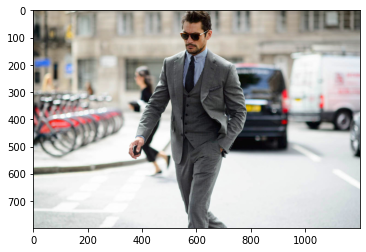

In [84]:
choosen_image_index = 12
choosen_image_path = os.path.join("Prechosen Samples", os.listdir(prechoosen_labels_path)[choosen_image_index])
plt.imshow(cv2.imread(choosen_image_path)[:,:,[2,1,0]])
with io.open(choosen_image_path, 'rb') as image_file:
        content = image_file.read()
image = types.Image(content=content)
all_labels = client.label_detection(image=image)
labels_and_crops = client.object_localization(image=image).localized_object_annotations
print(all_labels)
print(labels_and_crops)

<b>Labelling</b><br>
0 crop top.jpg: No crop top label<br>
1 dress.jpg: "One-piece garment", "Day dress", "Dress"<br>
2 heels.jpg: "High heels", "Sandal", "Basic pump"<br>
3 jeans.jpg: "Jeans"<br>
4 shirt 2.jpeg: "Shirt", "Dress shirt"<br>
5 shirt.jpg: I know the label exists. But it didnt come here<br>
6 shoes.jpg:"Shoe", "Footwear", "Outdoor shoe", "Walking shoe", "Sneakers"<br>
7 short 2.jpg: "Shorts"<br>
8 shorts.JPG: NA but gave shorts in crops<br>
9 skirt.jpg: Gave label in cropping<br>
10 sleeveless 2.jpg: "Active tank"<br>
11 sleeveless.jpg: "Undershirt"<br>
12 suit.jpg: Gave label in cropping<br>
13 tshirt.jpg: "T-shirt"<br>
14 tube top.JPG: NA<br>


<b>Cropping</b>
0 crop top.jpg:"Top"<br>
1 dress.jpg: "Dress", "Day dress"<br>
2 heels.jpg: "High heels"<br>
3 jeans.jpg: NA<br>
4 shirt 2.jpeg: "Top"<br>
5 shirt.jpg: "Top"<br>
6 shoes.jpg: "Shoe"<br>
7 short 2.jpg: "Shorts"<br>
8 shorts.JPG: "Shorts"<br>
9 skirt.jpg: "Miniskirt"<br>
10 sleeveless 2.jpg: "Top"<br>
11 sleeveless.jpg: "Top"<br>
12 suit.jpg: "Coat"<br>
13 tshirt.jpg: "Top"<br>
14 tube top.JPG: "Top"<br>

Load image and initialise vision api

In [3]:
client = vision.ImageAnnotatorClient()
path = 'test_img_full_sleeve_jeans.jpg'
# Read the image as a stream of bytes.
with io.open(path, 'rb') as image_file:
        content = image_file.read()

In [4]:
# Create annotate image request along with product search feature.
image = types.Image(content=content)

In [5]:
#### LABEL DETECTION ######

response_label = client.label_detection(image=image)
response_label
# for label in response_label.label_annotations:
#     print({'label': label.description, 'score': label.score})

label_annotations {
  mid: "/m/0dzct"
  description: "Face"
  score: 0.98537195
  topicality: 0.98537195
}
label_annotations {
  mid: "/m/03q69"
  description: "Hair"
  score: 0.98439115
  topicality: 0.98439115
}
label_annotations {
  mid: "/m/0fly7"
  description: "Jeans"
  score: 0.978821
  topicality: 0.978821
}
label_annotations {
  mid: "/m/04hgtk"
  description: "Head"
  score: 0.97340053
  topicality: 0.97340053
}
label_annotations {
  mid: "/m/05s2s"
  description: "Plant"
  score: 0.94240737
  topicality: 0.94240737
}
label_annotations {
  mid: "/m/06hwcd"
  description: "Dress shirt"
  score: 0.9045607
  topicality: 0.9045607
}
label_annotations {
  mid: "/m/038hg"
  description: "Green"
  score: 0.8978903
  topicality: 0.8978903
}
label_annotations {
  mid: "/j/3gbwgn"
  description: "People in nature"
  score: 0.8880111
  topicality: 0.8880111
}
label_annotations {
  mid: "/m/062581"
  description: "Sleeve"
  score: 0.8724505
  topicality: 0.8724505
}
label_annotations {
 

Useful

In [47]:
#### IMAGE PROPERTIES ######

response_image = client.image_properties(image=image)
response_image.image_properties_annotation.dominant_colors
# image_data = []

# for c in response_image.image_properties_annotation.dominant_colors.colors[:3]:
#     d = {
#         'color': c.color,
#         'score': c.score,
#         'pixel_fraction': c.pixel_fraction
#     }
#     print(d)

colors {
  color {
    red: 253.0
    green: 253.0
    blue: 251.0
  }
  score: 0.33308557
  pixel_fraction: 0.4077839
}
colors {
  color {
    red: 144.0
    green: 164.0
    blue: 178.0
  }
  score: 0.14091428
  pixel_fraction: 0.06336997
}
colors {
  color {
    red: 38.0
    green: 30.0
    blue: 28.0
  }
  score: 0.090831965
  pixel_fraction: 0.0687729
}
colors {
  color {
    red: 70.0
    green: 41.0
    blue: 25.0
  }
  score: 0.010570304
  pixel_fraction: 0.0053113555
}
colors {
  color {
    red: 152.0
    green: 106.0
    blue: 65.0
  }
  score: 0.0070856577
  pixel_fraction: 0.022527473
}
colors {
  color {
    red: 98.0
    green: 80.0
    blue: 63.0
  }
  score: 0.0056147175
  pixel_fraction: 0.0024725276
}
colors {
  color {
    red: 169.0
    green: 184.0
    blue: 193.0
  }
  score: 0.11870837
  pixel_fraction: 0.06959707
}
colors {
  color {
    red: 152.0
    green: 166.0
    blue: 174.0
  }
  score: 0.09398965
  pixel_fraction: 0.055128206
}
colors {
  color {
    r

In [7]:
client.annotate_image({
  'image': {'source': {'image_uri': 'gs://dsci551_storage/test_img/test_img_full_sleeve_jeans.jpg'}},
  'features': [{'type_': vision.Feature.Type.CROP_HINTS}]
})

crop_hints_annotation {
  crop_hints {
    bounding_poly {
      vertices {
      }
      vertices {
        x: 559
      }
      vertices {
        x: 559
        y: 316
      }
      vertices {
        y: 316
      }
    }
    confidence: 0.3125
    importance_fraction: 0.8035154
  }
}

In [8]:
client.annotate_image({
  'image': {'source': {'image_uri': 'gs://dsci551_storage/test_img/test_img_full_sleeve_jeans.jpg'}},
  'features': [{'type_': vision.Feature.Type.OBJECT_LOCALIZATION}]
})

localized_object_annotations {
  mid: "/m/047vlmn"
  name: "Outerwear"
  score: 0.8936261
  bounding_poly {
    normalized_vertices {
      x: 0.2664133
      y: 0.22361173
    }
    normalized_vertices {
      x: 0.7707164
      y: 0.22361173
    }
    normalized_vertices {
      x: 0.7707164
      y: 0.7437513
    }
    normalized_vertices {
      x: 0.2664133
      y: 0.7437513
    }
  }
}
localized_object_annotations {
  mid: "/m/0fly7"
  name: "Jeans"
  score: 0.8591622
  bounding_poly {
    normalized_vertices {
      x: 0.35790923
      y: 0.65368193
    }
    normalized_vertices {
      x: 0.70286864
      y: 0.65368193
    }
    normalized_vertices {
      x: 0.70286864
      y: 0.99545056
    }
    normalized_vertices {
      x: 0.35790923
      y: 0.99545056
    }
  }
}
localized_object_annotations {
  mid: "/m/01g317"
  name: "Person"
  score: 0.7694729
  bounding_poly {
    normalized_vertices {
      x: 0.24629639
      y: 0.05123509
    }
    normalized_vertices {
      

Useful

In [59]:
client.annotate_image({
  'image': {'source': {'image_uri': 'gs://dsci551_storage/test_img/test_img_full_sleeve_jeans.jpg'}},
  'features': [{'type_': vision.Feature.Type.IMAGE_PROPERTIES}]
})

image_properties_annotation {
  dominant_colors {
    colors {
      color {
        red: 71.0
        green: 92.0
        blue: 26.0
      }
      score: 0.13269271
      pixel_fraction: 0.059566326
    }
    colors {
      color {
        red: 46.0
        green: 60.0
        blue: 27.0
      }
      score: 0.109556854
      pixel_fraction: 0.070408165
    }
    colors {
      color {
        red: 50.0
        green: 54.0
        blue: 52.0
      }
      score: 0.048666585
      pixel_fraction: 0.11065051
    }
    colors {
      color {
        red: 143.0
        green: 160.0
        blue: 161.0
      }
      score: 0.030192211
      pixel_fraction: 0.04585459
    }
    colors {
      color {
        red: 97.0
        green: 133.0
        blue: 35.0
      }
      score: 0.025145823
      pixel_fraction: 0.026658162
    }
    colors {
      color {
        red: 203.0
        green: 188.0
        blue: 127.0
      }
      score: 0.022961715
      pixel_fraction: 0.02570153
    }
    c

Useful

In [46]:
client.object_localization(
        image=image).localized_object_annotations

[mid: "/m/0fly7"
name: "Jeans"
score: 0.8904737
bounding_poly {
  normalized_vertices {
    x: 0.0947443
    y: 0.61407584
  }
  normalized_vertices {
    x: 0.8173055
    y: 0.61407584
  }
  normalized_vertices {
    x: 0.8173055
    y: 0.9967591
  }
  normalized_vertices {
    x: 0.0947443
    y: 0.9967591
  }
}
, mid: "/m/0176mf"
name: "Belt"
score: 0.87694436
bounding_poly {
  normalized_vertices {
    x: 0.15183057
    y: 0.5973369
  }
  normalized_vertices {
    x: 0.6754036
    y: 0.5973369
  }
  normalized_vertices {
    x: 0.6754036
    y: 0.681338
  }
  normalized_vertices {
    x: 0.15183057
    y: 0.681338
  }
}
, mid: "/m/03gx245"
name: "Top"
score: 0.75977963
bounding_poly {
  normalized_vertices {
    x: 0.16827382
    y: 0.35215414
  }
  normalized_vertices {
    x: 0.73775464
    y: 0.35215414
  }
  normalized_vertices {
    x: 0.73775464
    y: 0.63070893
  }
  normalized_vertices {
    x: 0.16827382
    y: 0.63070893
  }
}
, mid: "/m/01g317"
name: "Person"
score: 0.6

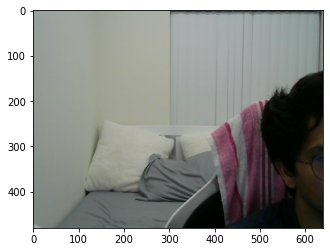

In [49]:
image1 = cv2.imread("background_frame.png")
plt.imshow(image1[:,:,[2,1,0]])
plt.show()

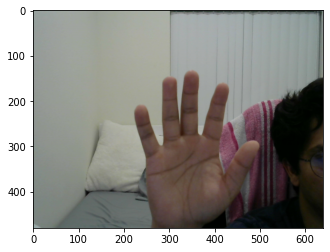

In [50]:
image2 = cv2.imread('clothing_capture.png')
plt.imshow(image2[:,:,[2,1,0]])
plt.show()

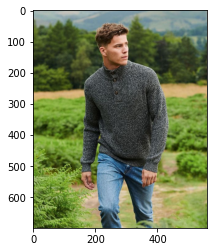

In [54]:
temp_img = cv2.imread('test_img_full_sleeve_jeans.jpg')
plt.imshow(temp_img[:,:,[2,1,0]])
plt.show()

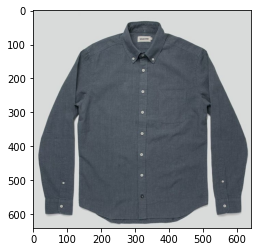

In [52]:
temp_img = cv2.imread('test_img_shirt.jpg')
plt.imshow(temp_img[:,:,[2,1,0]])
plt.show()

# OpenCV Image Capture

In [154]:
import cv2

cam = cv2.VideoCapture(0)
cam.set(cv2.CAP_PROP_EXPOSURE, 1) # Setting exposure to fixed value
background_capture_flag = 0
cv2.namedWindow("Capture Image of Clothing Item")
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("Capture Image of Clothing Item", frame)
    if(background_capture_flag == 1):
        cv2.imshow("Subtracted Image", cv2.absdiff(bg_frame, frame))
        #cv2.imshow("MOG2 Image", fgbg.apply(frame, bg_frame))

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "background_frame.png"
        cv2.imwrite(img_name, frame)
        print("Background Captured")
        background_capture_flag = 1
        bg_frame = cv2.imread("background_frame.png")
    elif k%256 == 113:
        img_name = 'clothing_capture.png'
        cv2.imwrite(img_name, frame)
        print("Clothing Item Captured")

cam.release()

cv2.destroyAllWindows()

Background Captured
Escape hit, closing...


In [153]:
image1 = cv2.imread("background_frame.png")
image2 = cv2.imread('clothing_capture.png')
# image3 = cv2.absdiff(image1, image2)
# image3 = cv2.subtract(image1, image2)
image3 = fgbg.apply(image2, image2)
cv2.imshow('image', image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [168]:
# Contour Test
image1 = cv2.imread("background_frame.png")
image2 = cv2.imread('clothing_capture.png')
image3 = cv2.absdiff(image1, image2)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# apply binary thresholding
ret, thresh = cv2.threshold(image3, 50, 255, cv2.THRESH_BINARY)
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = image3.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
               
# see the results
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Colour Detection


Custom Code


Webcolors

In [6]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return closest_name
# Usage
# requested_colour = (255, 0, 255)
# get_colour_name(requested_colour)


[161 165 158]
darkgray


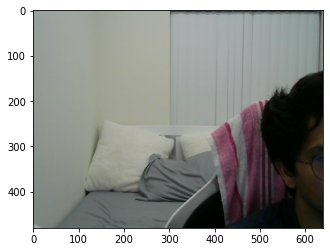

In [13]:
image1 = cv2.imread("background_frame.png")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
average = image1.mean(axis=0).mean(axis=0)
pixels = np.float32(image1.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
dominant = palette[np.argmax(counts)].astype(int)
print(dominant)
print(get_colour_name(dominant))
plt.imshow(image1)

# Color Detection with OpenCV

In [16]:
import cv2

cam = cv2.VideoCapture(0)
cam.set(cv2.CAP_PROP_AUTO_EXPOSURE, 3) # Setting exposure to fixed value
#cam.set(cv2.CAP_PROP_EXPOSURE, 1)
cv2.namedWindow("Capture Image of Clothing Item")
fgbg = cv2.createBackgroundSubtractorMOG2()
main_color = ''
while True:
    ret, frame = cam.read()
    cv2.putText(frame, "Color = " + main_color, 
                (220, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (0, 255, 255))
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("Capture Image of Clothing Item", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "find_color_frame.png"
        cv2.imwrite(img_name, frame)
        # Image captured for finding color
        print("Frame Captured")
        
        
        temp_img = cv2.imread("find_color_frame.png")
        temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
        # Average color across image. Need to make this region specific
        average = temp_img.mean(axis=0).mean(axis=0)
        pixels = np.float32(temp_img.reshape(-1, 3))
        # Top 5 colors
        n_colors = 5
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
        flags = cv2.KMEANS_RANDOM_CENTERS

        _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
        _, counts = np.unique(labels, return_counts=True)
        # Finds most dominant color
        dominant = palette[np.argmax(counts)].astype(int)
        main_color = get_colour_name(dominant)
        font = cv2.FONT_HERSHEY_SIMPLEX
        print(main_color)


cam.release()

cv2.destroyAllWindows()

Frame Captured
darkgray
Frame Captured
darkslategray
Frame Captured
gray
Frame Captured
black
Frame Captured
darkslateblue
Frame Captured
palevioletred
Escape hit, closing...


# Vision API Crop

In [17]:
client = vision.ImageAnnotatorClient()
path = 'test_img_full_sleeve_jeans.jpg'
# Read the image as a stream of bytes.
with io.open(path, 'rb') as image_file:
        content = image_file.read()
# Create annotate image request along with product search feature.
image = types.Image(content=content)
response_label = client.label_detection(image=image)

In [18]:
response_label

label_annotations {
  mid: "/m/0dzct"
  description: "Face"
  score: 0.98537195
  topicality: 0.98537195
}
label_annotations {
  mid: "/m/03q69"
  description: "Hair"
  score: 0.98439115
  topicality: 0.98439115
}
label_annotations {
  mid: "/m/0fly7"
  description: "Jeans"
  score: 0.978821
  topicality: 0.978821
}
label_annotations {
  mid: "/m/04hgtk"
  description: "Head"
  score: 0.97340053
  topicality: 0.97340053
}
label_annotations {
  mid: "/m/05s2s"
  description: "Plant"
  score: 0.94240737
  topicality: 0.94240737
}
label_annotations {
  mid: "/m/06hwcd"
  description: "Dress shirt"
  score: 0.9045607
  topicality: 0.9045607
}
label_annotations {
  mid: "/m/038hg"
  description: "Green"
  score: 0.8978903
  topicality: 0.8978903
}
label_annotations {
  mid: "/j/3gbwgn"
  description: "People in nature"
  score: 0.8880111
  topicality: 0.8880111
}
label_annotations {
  mid: "/m/062581"
  description: "Sleeve"
  score: 0.8724505
  topicality: 0.8724505
}
label_annotations {
 